# Installation des librairies nécessaires

In [1]:
#import tensorflow as tf
#from tensorflow import keras

#import os
#import tempfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Chargement des données

In [2]:
data = pd.read_csv('/Users/annabellenarsama/Desktop/FouillesDonneesMassives/guillaume.txt', sep=';', decimal=',')
data.head()

/var/folders/mk/hc7kkglj5fncc3271_yfcf6r0000gn/T/ipykernel_23198/2286139514.py:1: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/annabellenarsama/Desktop/FouillesDonneesMassives/guillaume.txt', sep=';', decimal=',')


,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20.0,2017-02-01 07:32:14,1,0,0,0,551,...,37.186668,52.076034,0,1,4.0,4.0,4.0,20.0,0.0,27134
1,A013011306908024927155000,78643045,0,20.0,2017-02-01 07:43:37,1,0,0,0,551,...,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,27817
2,A013010002908283134592527,78643046,0,57.64,2017-02-01 07:47:38,1,0,0,0,549,...,73.11828,52.076034,0,1,4.0,4.0,4.0,57.64,0.0,28058
3,A011010002908105209831316,78643047,0,54.29,2017-02-01 07:48:48,0,1,1,1,267,...,110.056926,53.554234,0,1,4.0,4.0,4.0,54.29,0.0,28128
4,A013010041908000125652029,78643048,0,26.9,2017-02-01 08:13:27,1,0,0,0,549,...,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,29607


# Description des données

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646774 entries, 0 to 4646773
Data columns (total 23 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   ZIBZIN                    object
 1   IDAvisAutorisationCheque  object
 2   FlagImpaye                object
 3   Montant                   object
 4   DateTransaction           object
 5   CodeDecision              object
 6   VerifianceCPT1            object
 7   VerifianceCPT2            object
 8   VerifianceCPT3            object
 9   D2CB                      object
 10  ScoringFP1                object
 11  ScoringFP2                object
 12  ScoringFP3                object
 13  TauxImpNb_RB              object
 14  TauxImpNB_CPM             object
 15  EcartNumCheq              object
 16  NbrMagasin3J              object
 17  DiffDateTr1               object
 18  DiffDateTr2               object
 19  DiffDateTr3               object
 20  CA3TRetMtt                object
 21  CA3TR   

In [4]:
print("Dimensions :", data.shape, '\n') # 4,646,774 observations, 23 variables
print("Classe :", type(data), '\n') # df
print("Variables : \n", data.columns)

Dimensions : (4646774, 23) 

Classe : <class 'pandas.core.frame.DataFrame'> 

Variables : 
 Index(['ZIBZIN', 'IDAvisAutorisationCheque', 'FlagImpaye', 'Montant',
       'DateTransaction', 'CodeDecision', 'VerifianceCPT1', 'VerifianceCPT2',
       'VerifianceCPT3', 'D2CB', 'ScoringFP1', 'ScoringFP2', 'ScoringFP3',
       'TauxImpNb_RB', 'TauxImpNB_CPM', 'EcartNumCheq', 'NbrMagasin3J',
       'DiffDateTr1', 'DiffDateTr2', 'DiffDateTr3', 'CA3TRetMtt', 'CA3TR',
       'Heure'],
      dtype='object')


# Suppresion des variables inutiles

In [5]:
data.iloc[1956360]

ZIBZIN                                        ZIBZIN
IDAvisAutorisationCheque    IDAvisAutorisationCheque
FlagImpaye                                FlagImpaye
Montant                                      Montant
DateTransaction                      DateTransaction
CodeDecision                            CodeDecision
VerifianceCPT1                        VerifianceCPT1
VerifianceCPT2                        VerifianceCPT2
VerifianceCPT3                        VerifianceCPT3
D2CB                                            D2CB
ScoringFP1                                ScoringFP1
ScoringFP2                                ScoringFP2
ScoringFP3                                ScoringFP3
TauxImpNb_RB                            TauxImpNb_RB
TauxImpNB_CPM                          TauxImpNB_CPM
EcartNumCheq                            EcartNumCheq
NbrMagasin3J                            NbrMagasin3J
DiffDateTr1                              DiffDateTr1
DiffDateTr2                              DiffD

In [6]:
data.drop(1956360,inplace=True)

In [7]:
data.drop(columns=['CodeDecision', 'ZIBZIN'], inplace=True)

In [8]:
data.shape

(4646773, 21)

# Reformatage des variables restantes

In [9]:
# Reformatage de la variable 'Montant' en variable quantitative :
print(data['Montant'].dtypes) # object
data['Montant'] = data['Montant'].astype(str).str.replace(",", ".").astype(float)

# Vérification du type de la variable :
print(data['Montant'].dtypes) # float64

object
float64


In [10]:
# Reformatage des variables 'Scoring' en variables quantitatives :

print("ScoringFP1 :", data['ScoringFP1'].dtypes) # object
data['ScoringFP1'] = data['ScoringFP1'].astype(str).str.replace(",", ".").astype(float)

print("ScoringFP2 :", data['ScoringFP2'].dtypes) # object
data['ScoringFP2'] = data['ScoringFP2'].astype(str).str.replace(",", ".").astype(float)

print("ScoringFP3 :", data['ScoringFP3'].dtypes) # object
data['ScoringFP3'] = data['ScoringFP3'].astype(str).str.replace(",", ".").astype(float)

# Vérification du type des variables 'Scoring' :

print("ScoringFP1 :", data['ScoringFP1'].dtypes) # float64

print("ScoringFP2 :", data['ScoringFP2'].dtypes) # float64

print("ScoringFP3 :", data['ScoringFP3'].dtypes) # float64

ScoringFP1 : object
ScoringFP2 : object
ScoringFP3 : object
ScoringFP1 : float64
ScoringFP2 : float64
ScoringFP3 : float64


In [11]:
# Reformatage des variables 'TauxImp' en variables quantitatives :

print('TauxImpNb_RB :', data['TauxImpNb_RB'].dtypes) # object
data['TauxImpNb_RB'] = data['TauxImpNb_RB'].astype(str).str.replace(",", ".").astype(float)

print('TauxImpNB_CPM :', data['TauxImpNB_CPM'].dtypes) # object
data['TauxImpNB_CPM'] = data['TauxImpNB_CPM'].astype(str).str.replace(",", ".").astype(float)

# Vérification du type des variables :

print('TauxImpNb_RB :', data['TauxImpNb_RB'].dtypes) # float64

print('TauxImpNB_CPM :', data['TauxImpNB_CPM'].dtypes) # float64

TauxImpNb_RB : object
TauxImpNB_CPM : object
TauxImpNb_RB : float64
TauxImpNB_CPM : float64


In [12]:
# Reformatage des variables 'DiffDate' en variables quantitatives :

print('DiffDateTr1 :', data['DiffDateTr1'].dtypes) # object
data['DiffDateTr1'] = data['DiffDateTr1'].astype(str).str.replace(",", ".").astype(float)

print('DiffDateTr2 :', data['DiffDateTr2'].dtypes) # object
data['DiffDateTr2'] = data['DiffDateTr2'].astype(str).str.replace(",", ".").astype(float)

print('DiffDateTr3 :', data['DiffDateTr3'].dtypes) # object
data['DiffDateTr3'] = data['DiffDateTr3'].astype(str).str.replace(",", ".").astype(float)

# Vérification du type des variables :

print('DiffDateTr1 :', data['DiffDateTr1'].dtypes) # float64

print('DiffDateTr2 :', data['DiffDateTr2'].dtypes) # float64

print('DiffDateTr3 :', data['DiffDateTr3'].dtypes) # float64

DiffDateTr1 : object
DiffDateTr2 : object
DiffDateTr3 : object
DiffDateTr1 : float64
DiffDateTr2 : float64
DiffDateTr3 : float64


In [13]:
# Reformatage des variables 'CAT3TR' en variable quantitative :

print('CA3TRetMtt :', data['CA3TRetMtt'].dtypes) # object
data['CA3TRetMtt'] = data['CA3TRetMtt'].astype(str).str.replace(",", ".").astype(float)

print('CA3TR :', data['CA3TR'].dtypes) # object
data['CA3TR'] = data['CA3TR'].astype(str).str.replace(",", ".").astype(float)

# Vérification du type de Valeur foncière :

print('CA3TRetMtt :', data['CA3TRetMtt'].dtypes) # float64

print('CA3TR :', data['CA3TR'].dtypes) # float64

CA3TRetMtt : object
CA3TR : object
CA3TRetMtt : float64
CA3TR : float64


In [14]:
print('DateTransaction :', data['DateTransaction'].dtypes)
data['DateTransaction'] = pd.to_datetime(data['DateTransaction'], yearfirst=True)

# Création de trois nouvelles colonnes : Année, Mois, Jour
data['Année'] = data['DateTransaction'].dt.year
data['Mois'] = data['DateTransaction'].dt.month
data['Jour'] = data['DateTransaction'].dt.day

# Création de trois nouvelles colonnes : Heure, Minute, Seconde
data['Heure'] = data['DateTransaction'].dt.hour
data['Minute'] = data['DateTransaction'].dt.minute
data['Seconde'] = data['DateTransaction'].dt.second

print('Date : \n', data[['Année', 'Mois', 'Jour', 'Heure', 'Minute', 'Seconde']].dtypes)

DateTransaction : object
Date : 
 Année      int32
Mois       int32
Jour       int32
Heure      int32
Minute     int32
Seconde    int32
dtype: object


In [15]:
data["VerifianceCPT1"] = data["VerifianceCPT1"].astype(float)
data["VerifianceCPT2"] = data["VerifianceCPT2"].astype(float)
data["VerifianceCPT3"] = data["VerifianceCPT3"].astype(float)
data["IDAvisAutorisationCheque"] = data["IDAvisAutorisationCheque"].astype(float)
data["EcartNumCheq"] = data["EcartNumCheq"].astype(float)
data["NbrMagasin3J"] = data["NbrMagasin3J"].astype(float)
data["D2CB"] = data["D2CB"].astype(float)

In [16]:
# Reformatage de 'FlagImpaye' en booléen :
print('FlagImpaye :', data['FlagImpaye'].dtypes)
data['FlagImpaye'] = data['FlagImpaye'].astype(bool)

# Vérification du reformatage :
print('FlagImpaye :', data['FlagImpaye'].dtypes, "\n")

# Modalités de la variable :
print('Modalités de la cible :', data['FlagImpaye'].unique()) # vérification des valeurs booléennes de la variable FlagImpaye

FlagImpaye : object
FlagImpaye : bool 

Modalités de la cible : [False  True]


In [17]:
data.dtypes

IDAvisAutorisationCheque           float64
FlagImpaye                            bool
Montant                            float64
DateTransaction             datetime64[ns]
VerifianceCPT1                     float64
VerifianceCPT2                     float64
VerifianceCPT3                     float64
D2CB                               float64
ScoringFP1                         float64
ScoringFP2                         float64
ScoringFP3                         float64
TauxImpNb_RB                       float64
TauxImpNB_CPM                      float64
EcartNumCheq                       float64
NbrMagasin3J                       float64
DiffDateTr1                        float64
DiffDateTr2                        float64
DiffDateTr3                        float64
CA3TRetMtt                         float64
CA3TR                              float64
Heure                                int32
Année                                int32
Mois                                 int32
Jour       

# Classe majoritaire (négative) vs. Classe minoritaire (positive)

In [18]:
neg, pos = np.bincount(data['FlagImpaye'])
total = neg + pos
print('Examples:\n    Total: {}\n   Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

# https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


Examples:
    Total: 4646773
   Positive: 62622 (1.35% of total)



In [19]:
IR = neg/pos
print(f'Imbalance Ratio: {IR}')

Imbalance Ratio: 73.20352272364345


# Plot des classes

<Axes: xlabel='count', ylabel='FlagImpaye'>

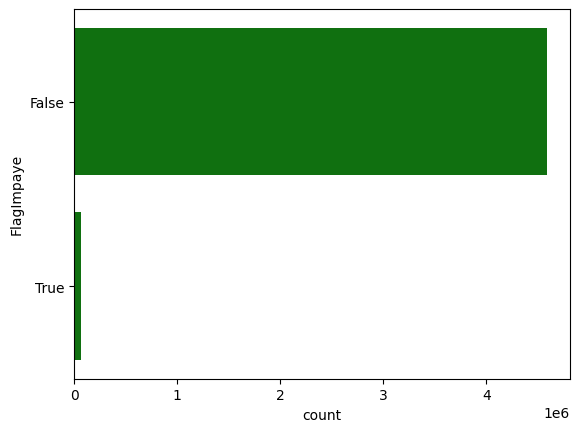

In [20]:
sns.barplot(data['FlagImpaye'].value_counts(), orient='h', color='green')

# Train-Test Split

In [21]:
# Trier les données en fonction de la date :
df = data.sort_values(by='DateTransaction')
df

,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,...,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
0,78643044.0,False,20.00,2017-02-01 07:32:14,0.0,0.0,0.0,551.0,0.000000,0.000000,...,4.0,4.0,20.00,0.00,7,2017,2,1,32,14
1,78643045.0,False,20.00,2017-02-01 07:43:37,0.0,0.0,0.0,551.0,0.000000,0.000000,...,4.0,4.0,28.61,8.61,7,2017,2,1,43,37
2,78643046.0,False,57.64,2017-02-01 07:47:38,0.0,0.0,0.0,549.0,0.000000,0.000000,...,4.0,4.0,57.64,0.00,7,2017,2,1,47,38
1956361,78643047.0,True,54.29,2017-02-01 07:48:48,1.0,1.0,1.0,267.0,0.000000,0.000000,...,4.0,4.0,54.29,0.00,7,2017,2,1,48,48
3,78643047.0,False,54.29,2017-02-01 07:48:48,1.0,1.0,1.0,267.0,0.000000,0.000000,...,4.0,4.0,54.29,0.00,7,2017,2,1,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646769,84966399.0,False,23.94,2017-11-30 21:20:15,0.0,0.0,0.0,1.0,4.788000,-22.542614,...,5.0,5.0,23.94,0.00,21,2017,11,30,20,15
4646770,84966400.0,False,92.60,2017-11-30 21:22:49,0.0,0.0,0.0,514.0,0.060052,-2.236379,...,4.0,4.0,262.45,169.85,21,2017,11,30,22,49
4646771,84966401.0,False,69.00,2017-11-30 21:24:37,0.0,0.0,0.0,1.0,3.631579,-1.062954,...,5.0,5.0,69.00,0.00,21,2017,11,30,24,37
4646772,84966402.0,False,57.80,2017-11-30 21:57:32,0.0,0.0,0.0,1.0,28.900000,0.567666,...,5.0,5.0,57.80,0.00,21,2017,11,30,57,32


In [22]:
df.drop(columns=['DateTransaction'], inplace=True)

In [23]:
df.shape

(4646773, 25)

In [24]:
# Split train/test sets selon la date de transaction :
train_size = 0.7
split_index = int(len(df) * train_size)

train_data = df[:split_index]
test_data = df[split_index:]

In [25]:
# Split des features et du label :

X_train = train_data.drop(columns=['FlagImpaye'])
X_test = test_data.drop(columns=['FlagImpaye'])

y_train = train_data['FlagImpaye']
y_test = test_data['FlagImpaye']

In [26]:
X_train.shape

(3252741, 24)

In [27]:
y_train.shape

(3252741,)

In [28]:
X_test.shape

(1394032, 24)

In [29]:
y_test.shape

(1394032,)

In [30]:
# Imbalance Ratio du train set :

neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n   Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 3252741
   Positive: 50682 (1.56% of total)



In [31]:
neg/pos

63.1794128092814

# Tomek Link (undersampling)

In [32]:
#from imblearn.under_sampling import TomekLinks

#tomek = TomekLinks(sampling_strategy='majority', n_jobs=8)

#X_rus, y_rus = tomek.fit_resample(X_train, y_train)

In [33]:
#predictor_names = X_train.columns

#X_tl = pd.DataFrame(data=X_rus, columns=predictor_names)
#y_tl = y_rus

# Enregistrement du DataFrame dans un fichier CSV
#X_tl.to_csv("X_tomek.csv", index=False)
#y_tl.to_csv("y_tomek.csv", index=False)

In [34]:
X_tomek = pd.read_csv('/Users/annabellenarsama/Desktop/FouillesDonneesMassives/X_tomek.csv')
X_tomek.head()

,IDAvisAutorisationCheque,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,...,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Année,Mois,Jour,Minute,Seconde
0,78643044.0,20.00,0.0,0.0,0.0,551.0,0.0,0.0,0.0,37.186668,...,4.0,4.0,20.00,0.00,7,2017,2,1,32,14
1,78643045.0,20.00,0.0,0.0,0.0,551.0,0.0,0.0,0.0,48.844716,...,4.0,4.0,28.61,8.61,7,2017,2,1,43,37
2,78643046.0,57.64,0.0,0.0,0.0,549.0,0.0,0.0,0.0,73.118280,...,4.0,4.0,57.64,0.00,7,2017,2,1,47,38
3,78643047.0,54.29,1.0,1.0,1.0,267.0,0.0,0.0,0.0,110.056926,...,4.0,4.0,54.29,0.00,7,2017,2,1,48,48
4,78643047.0,54.29,1.0,1.0,1.0,267.0,0.0,0.0,0.0,110.056926,...,4.0,4.0,54.29,0.00,7,2017,2,1,48,48


In [35]:
y_tomek = pd.read_csv('/Users/annabellenarsama/Desktop/FouillesDonneesMassives/y_tomek.csv')
y_tomek.head()

,FlagImpaye
0,False
1,False
2,False
3,True
4,False


In [36]:
X_tomek.shape

(3251078, 24)

In [37]:
y_tomek.shape

(3251078, 1)

In [41]:
# Imbalance Ratio du Tomek Link :

neg, pos = np.bincount(y_tomek['FlagImpaye'])
total = neg + pos
print('Examples:\n    Total: {}\n   Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 3251078
   Positive: 50682 (1.56% of total)



# Chargement des données train ré-échantillonnées par SMOTEEN

In [42]:
X = pd.read_csv('/Users/annabellenarsama/Desktop/FouillesDonneesMassives/X.csv', sep=',')
y = pd.read_csv('/Users/annabellenarsama/Desktop/FouillesDonneesMassives/y.csv', sep=',')

In [43]:
X.drop(columns=['Unnamed: 0'], inplace=True)
y.drop(columns=['Unnamed: 0'], inplace=True)

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794420 entries, 0 to 3794419
Data columns (total 24 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   IDAvisAutorisationCheque  float64
 1   Montant                   float64
 2   VerifianceCPT1            float64
 3   VerifianceCPT2            float64
 4   VerifianceCPT3            float64
 5   D2CB                      float64
 6   ScoringFP1                float64
 7   ScoringFP2                float64
 8   ScoringFP3                float64
 9   TauxImpNb_RB              float64
 10  TauxImpNB_CPM             float64
 11  EcartNumCheq              float64
 12  NbrMagasin3J              float64
 13  DiffDateTr1               float64
 14  DiffDateTr2               float64
 15  DiffDateTr3               float64
 16  CA3TRetMtt                float64
 17  CA3TR                     float64
 18  Heure                     int64  
 19  Année                     int64  
 20  Mois                    

In [45]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794420 entries, 0 to 3794419
Data columns (total 1 columns):
 #   Column      Dtype
---  ------      -----
 0   FlagImpaye  bool 
dtypes: bool(1)
memory usage: 3.6 MB


In [46]:
print(f"Dimensions de X : {X.shape}")
print(f"Noms des variables de X : \n {X.columns} ")

print("\n")

print(f"Dimensions de y : {y.shape}")
print(f"Noms des variables de y : \n {y.columns} ")

Dimensions de X : (3794420, 24)
Noms des variables de X : 
 Index(['IDAvisAutorisationCheque', 'Montant', 'VerifianceCPT1',
       'VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP1', 'ScoringFP2',
       'ScoringFP3', 'TauxImpNb_RB', 'TauxImpNB_CPM', 'EcartNumCheq',
       'NbrMagasin3J', 'DiffDateTr1', 'DiffDateTr2', 'DiffDateTr3',
       'CA3TRetMtt', 'CA3TR', 'Heure', 'Année', 'Mois', 'Jour', 'Minute',
       'Seconde'],
      dtype='object') 


Dimensions de y : (3794420, 1)
Noms des variables de y : 
 Index(['FlagImpaye'], dtype='object') 


In [47]:
neg, pos = np.bincount(y['FlagImpaye'])
total = neg + pos
print('Examples:\n    Total: {}\n   Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 3794420
   Positive: 21925 (0.58% of total)



# K-Means

In [79]:
from sklearn.cluster import KMeans

# Instanciation de l'algorithme :
kmeans = KMeans(n_clusters=2, random_state=1)

# Fit du modèle sur les données rééchantillonnées :
kmeans.fit(X_tomek, y_tomek)

/Users/annabellenarsama/anaconda3/envs/bigdataenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=1)

In [80]:
# Paramètres du modèle :
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Affichage des paramètres du modèle :
print("Centroïdes de chaque exemple : \n", centers, "\n")
print("Étiquetage des exemples :", labels)

Centroïdes de chaque exemple : 
 [[7.92740779e+07 5.84940266e+01 2.35443238e-01 2.50560623e-01
  2.75855087e-01 3.58179406e+02 1.61660103e+00 3.13205984e+00
  9.76480648e-02 3.86652718e+01 3.84445858e+01 9.82945064e+03
  1.03912755e+00 3.81793035e+00 4.11874252e+00 4.15314213e+00
  6.56583118e+01 7.16428513e+00 1.39178170e+01 2.01700000e+03
  2.55157033e+00 1.53370731e+01 2.94907070e+01 2.95049328e+01]
 [8.05514080e+07 6.00595895e+01 2.95838615e-01 3.15998046e-01
  3.49942426e-01 3.25744074e+02 2.03353109e+00 2.30295178e+00
  1.24389114e-01 3.89213792e+01 3.84397053e+01 8.61779714e+03
  1.03693481e+00 3.86129865e+00 4.15656107e+00 4.18950884e+00
  6.72614297e+01 7.20184012e+00 1.40411047e+01 2.01700000e+03
  4.53827456e+00 1.53448903e+01 2.94977671e+01 2.95047211e+01]] 

Étiquetage des exemples : [0 0 0 ... 1 1 1]


In [81]:
# Prédiction :
y_pred_kmeans = kmeans.predict(X_test)

In [82]:
# Évaluation :
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Matrice de confusion :
conf_m = pd.crosstab(y_test, y_pred_kmeans, margins=True)
conf_m


col_0,1,All
FlagImpaye,,
False,1382092,1382092
True,11940,11940
All,1394032,1394032


In [83]:
mc = confusion_matrix(y_test, y_pred_kmeans)
mc

array([[      0, 1382092],
       [      0,   11940]])

In [84]:
# Rapport complet des métriques du modèle (se concentre sur la classe majoritaire):
metriques = classification_report(y_test, y_pred_kmeans)
print(metriques)

/Users/annabellenarsama/anaconda3/envs/bigdataenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annabellenarsama/anaconda3/envs/bigdataenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00   1382092
        True       0.01      1.00      0.02     11940

    accuracy                           0.01   1394032
   macro avg       0.00      0.50      0.01   1394032
weighted avg       0.00      0.01      0.00   1394032



/Users/annabellenarsama/anaconda3/envs/bigdataenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Métriques du modèle sur la classe minoritaire

In [85]:
# Binary :
#f1_bin = f1_score(y_test, y_pred, average='binary', pos_label=1)
#print(f"La F1-mesure avec un binary average est de : {f1_bin}.")

# Weighted (par défaut) :
f1_weigh = f1_score(y_test, y_pred_kmeans, average='weighted', pos_label=1)
print(f"La F1-mesure avec un weighted average est de : {f1_weigh}.")

# Macro :
#f1_mac = f1_score(y_test, y_pred, average='macro', pos_label=1)
#print(f"La F1-mesure avec un macro average est de : {f1_mac}.")

# Micro :
#f1_mic = f1_score(y_test, y_pred, average='micro', pos_label=1)
#print(f"La F1-mesure avec un micro average est de : {f1_mic}.")

# None (f1 score pour chaque classe comme le ferait le binaire):
#f1_none = f1_score(y_test, y_pred, average=None)
#print(f"La F1-mesure pour chaque classe est de : {f1_none}.")

La F1-mesure avec un weighted average est de : 0.00014547529092249242.


# Régression logistique

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Création du modèle :
reglog = LogisticRegression()

# Entraînement :
reglog.fit(X_tomek, y_tomek)

# Prédictions :
y_pred_reg = reglog.predict(X_test)

# Évaluation :
precision = metrics.precision_score(y_test, y_pred_reg, average=None, pos_label=1)
recall = metrics.recall_score(y_test, y_pred_reg, average=None, pos_label=1)
f1_score = metrics.f1_score(y_test, y_pred_reg,average=None, pos_label=1)

# Affichage des performances :
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1 Score : {f1_score}")

/Users/annabellenarsama/anaconda3/envs/bigdataenv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annabellenarsama/anaconda3/envs/bigdataenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision : [0.99143492 0.        ]
Recall : [1. 0.]
F1 Score : [0.99569904 0.        ]


# Auto-Encodeur

Epoch 1/10
25400/25400 [==============================] - 10s 401us/step - loss: -702941560576147456.0000
Epoch 2/10
25400/25400 [==============================] - 10s 390us/step - loss: -4307110302417158144.0000
Epoch 3/10
25400/25400 [==============================] - 10s 392us/step - loss: -11081184948470677504.0000
Epoch 4/10
25400/25400 [==============================] - 10s 390us/step - loss: -20998264160056770560.0000
Epoch 5/10
25400/25400 [==============================] - 15s 585us/step - loss: -34003606551763353600.0000
Epoch 6/10
25400/25400 [==============================] - 11s 417us/step - loss: -50129901703795834880.0000
Epoch 7/10
25400/25400 [==============================] - 9s 360us/step - loss: -69386009480850833408.0000
Epoch 8/10
25400/25400 [==============================] - 9s 355us/step - loss: -91771503272416772096.0000
Epoch 9/10
25400/25400 [==============================] - 9s 374us/step - loss: -117287077969842405376.0000
Epoch 10/10
25400/25400 [========

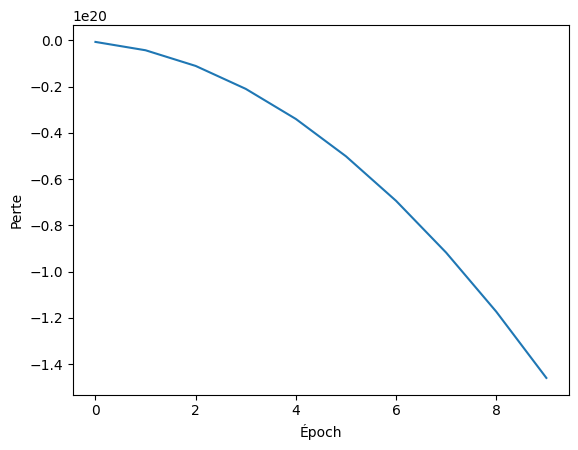

/Users/annabellenarsama/anaconda3/envs/bigdataenv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf

# Dimension des données d'entrée :
input_dim = X_tomek.shape[1]  # nombre de caractéristiques dans nos données

# Architecture de l'auto-encodeur :
input_layer = Input(shape=(input_dim))
encoded = Dense(16, activation='relu')(input_layer)  # couche d'encodage
decoded = Dense(input_dim, activation='sigmoid')(encoded)  # couche de décodage

# Créer le modèle :
autoencoder = Model(input_layer, decoded)

# Compiler le modèle :
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entraîner le modèle :
with tf.device('/device:GPU:0'): # utiliser le GPU pour les calculs
    history = autoencoder.fit(X_tomek, X_tomek, epochs=10, batch_size=128, shuffle=True)

# Visualisation de l'évolution de la perte :
plt.plot(history.history['loss'])
plt.xlabel('Époch')
plt.ylabel('Perte')
plt.show()

# Sauvegarde du modèle :
autoencoder.save('autoencoder_model.h5')

In [88]:
# Prédiction :

# Charger le modèle entraîné :
loaded_autoencoder = tf.keras.models.load_model('autoencoder_model.h5')

# Faire des prédictions sur l'ensemble de test :
y_pred_nn = loaded_autoencoder.predict(X_test)


43564/43564 [==============================] - 9s 208us/step


In [89]:
from sklearn.metrics import f1_score
import numpy as np

# Calculer la perte de reconstruction (MSE)
mse = np.mean(np.power(X_test - y_pred_nn, 2), axis=1)

# Supposer un seuil pour définir les anomalies
seuil = 0.1  # Vous devez ajuster ce seuil en fonction de votre problème

# Binariser les prédictions en fonction du seuil
anomalies = (mse > seuil).astype(int)

# Calculer le F1-score
f1 = f1_score(y_test, anomalies)

print("F1-score:", f1)

F1-score: 0.016984691018028807


# Loss

In [90]:
def EtudeGainPerte(X_test, y_test, y_pred):

    poids = 0.05

    tab = []

#Passage des y en liste
    y_test=list(y_test)
    y_pred=list(y_pred)

    for i in range(len(X_test)):
        TN=0
        FP=0
        FN=0
        TP=0

        M = X_test.iloc[i]['Montant']

        if (y_test[i]==0 & y_pred[i]==0):
            TN = 0.05 * M
        elif(y_test[i]==0 & y_pred[i]==1):
            FP = 0.70 * M * 0.05
        elif(y_test[i]==1 & y_pred[i]==1):
            TP = poids * M 
        else:
            if M <= 20:
                FN = 0
            elif M <= 50:
                FN = 0.2 * M
            elif M <= 100:
                FN = 0.3 * M
            elif M <= 200:
                FN = 0.5 * M
            else:
                FN = 0.8 * M
        rt = TN + FP - FN + TP


        tab.append(rt)
    return tab

In [94]:
loss_kmeans = EtudeGainPerte(X_test, y_test, y_pred_kmeans)
sum(loss_kmeans)

4343895.025502005

In [92]:
loss_reg = EtudeGainPerte(X_test, y_test, y_pred_reg)
sum(loss_reg)

3659124.154501696